##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

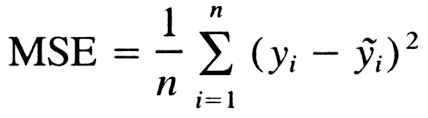

ybar is the predicted output.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)


In [51]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(1)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = np.dot(X,theta)

        # Calculate the error: use the mse function
        error = predictions-y

        # Calculate the gradients: 1/m * X.T * error
        gradients = np.dot(error.reshape(1,-1),X)/m

        # Update parameters: Apply the GD algorithm
        theta -= learning_rate*gradients.ravel()

        # Calculate the cost function: MSE
        cost = np.sum(error**2)/(2*m)
        cost_history.append(cost)

    return theta, cost_history



In [52]:
# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 10000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)
print(cost_history[-1])

51.09438945063354


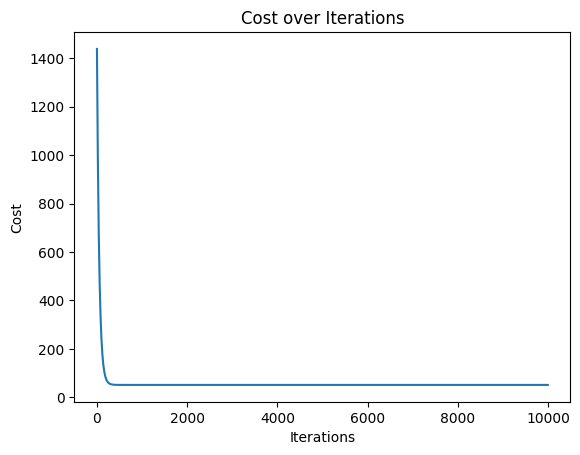

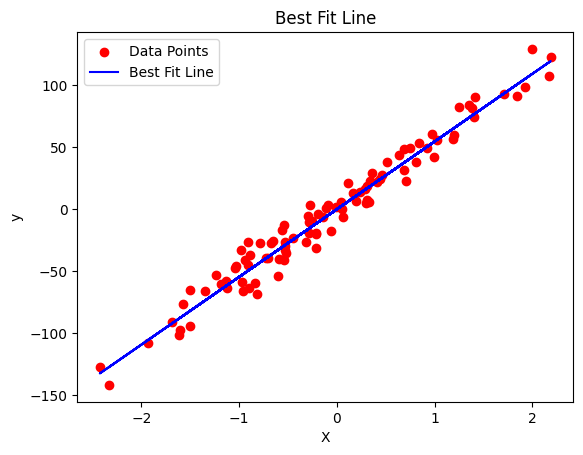

In [53]:
# Plot the cost function over iterations
iterations = range(1, 10001, 10)
plt.plot(list(iterations), [cost_history[i-1] for i in iterations])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()


# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

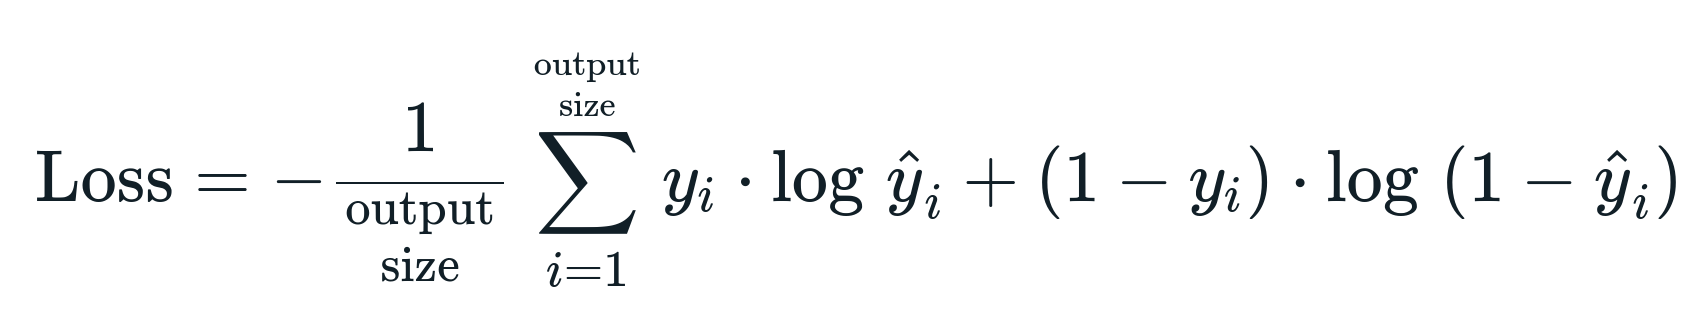


In [73]:
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


[1.8095925691585035, 1.7991510672067106, 1.7887427250560952, 1.778367852285886, 1.7680267592487582, 1.7577197569926637, 1.7474471571801566, 1.7372092720052246, 1.727006414107601, 1.7168388964845547, 1.7067070324001616, 1.6966111352920477, 1.6865515186756121, 1.6765284960457323, 1.666542380775971, 1.6565934860152804, 1.6466821245822434, 1.6368086088568499, 1.6269732506698515, 1.6171763611897152, 1.607418250807209, 1.597699229017662, 1.58801960430094, 1.5783796839991808, 1.5687797741923444, 1.5592201795716334, 1.54970120331085, 1.5402231469357448, 1.5307863101914472, 1.5213909909080332, 1.5120374848643354, 1.502726085650063, 1.493457084526339, 1.4842307702847433, 1.4750474291049749, 1.4659073444112314, 1.4568107967274304, 1.447758063531384, 1.43874941910806, 1.4297851344020511, 1.4208654768693918, 1.4119907103288674, 1.4031610948129518, 1.3943768864185284, 1.385638337157553, 1.3769456948078065, 1.3682992027639138, 1.3596990998887868, 1.3511456203656684, 1.3426389935509462, 1.334179443827

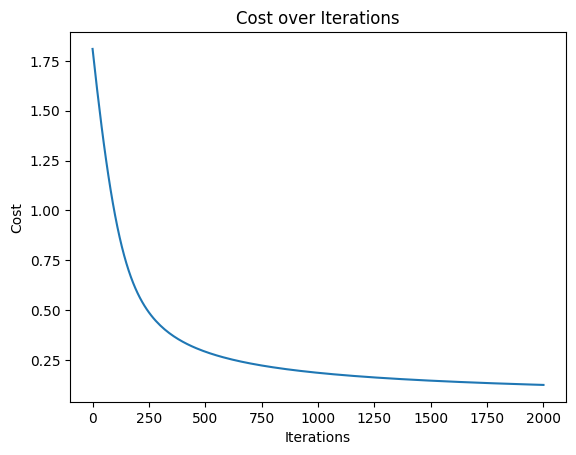

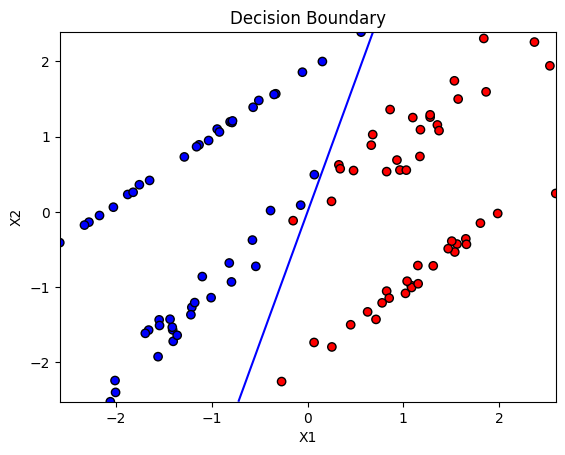

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta=np.random.randn(2)
    # shape of theta is (2,) a 1-D array
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.

        predictions=sigmoid(np.dot(X,theta))

        # Calculate the error: y_pred - y
        error = predictions-y

        # Calculate the gradients:
        gradients=(1/m)*(np.dot(X.T, error))
        # Update parameters:
        theta -= learning_rate*gradients

        # Calculate the cost function: log loss
        cost = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) / m

        cost_history.append(cost)

    return theta, cost_history

# # Generate random classification data using scikit-learn
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 10000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)
print(cost_history)


# Plot the cost function over iterations
iterations = range(0, min(num_iterations, 2001), 10)
plt.plot(list(iterations), [cost_history[i] for i in iterations])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()